In [1]:
import cfe
import scanpy as sc

cfe.settings.backend = "dynverse_docker"

[2025年01月16日 18时03分56秒] INFO                                                                                 
                                          _____     _ _ ______    _       ______            _                      
                                         / ____|   | | |  ____|  | |     |  ____|          | |                     
                                        | |     ___| | | |__ __ _| |_ ___| |__  __  ___ __ | | ___  _ __ ___ _ __  
                                        | |    / _ \ | |  __/ _` | __/ _ \  __| \ \/ / '_ \| |/ _ \| '__/ _ \ '__| 
                                        | |___|  __/ | | | | (_| | ||  __/ |____ >  <| |_) | | (_) | | |  __/ |    
                                         \_____\___|_|_|_|  \__,_|\__\___|______/_/\_\ .__/|_|\___/|_|  \___|_|    
                                                                                     | |                           
                                                                              

数据

AnnData object with n_obs × n_vars = 926 × 1128
    obs: 'c', 'milestone_color', 'milestone'
    var: 'feature_id', 'housekeeping'
    uns: 'cfe', 'pca', 'tsne', 'milestone_colors', 'milestone_color_colors'
    obsm: 'X_pca', 'X_tsne', 'milestone_network_emb'
    varm: 'PCs'
    layers: 'expression', 'counts'

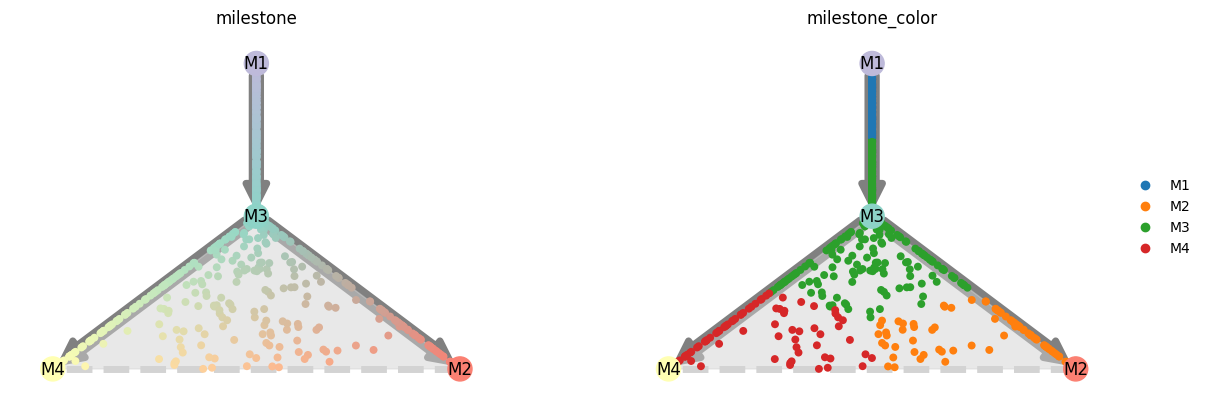

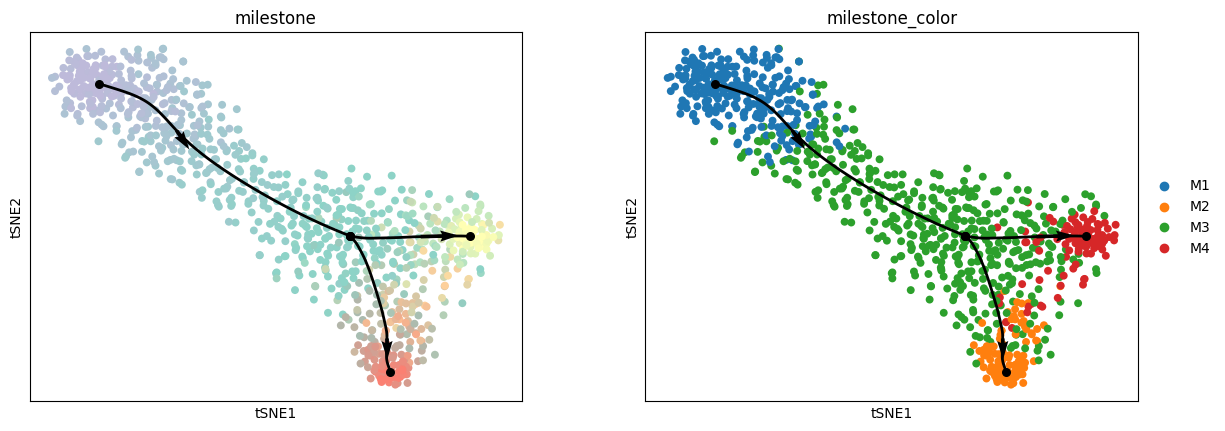

In [2]:
fadata = cfe.data.FateAnnData.read_dynverse_simulation_data()

cluster_key = "milestone_color"
fadata.group_onto_nearest_milestones(cluster_key=cluster_key) # new cluster color
sc.tl.tsne(fadata)

cluster_key_list = ["milestone", cluster_key]
cfe.plot.plot_graph(fadata, color=cluster_key_list)
cfe.plot.plot_trajectory(fadata, basis="tsne", color=cluster_key_list)
fadata

Method and plot

[2025年01月16日 18时04分08秒] INFO     method_backend:                                                             
                                       <cfe.method.fate_dynverse_docker_backend.DynverseDockerBackend object at    
                                       0x73c9d495b9a0>                                                             


<Axes: title={'center': 'milestone_color'}, xlabel='tSNE1', ylabel='tSNE2'>

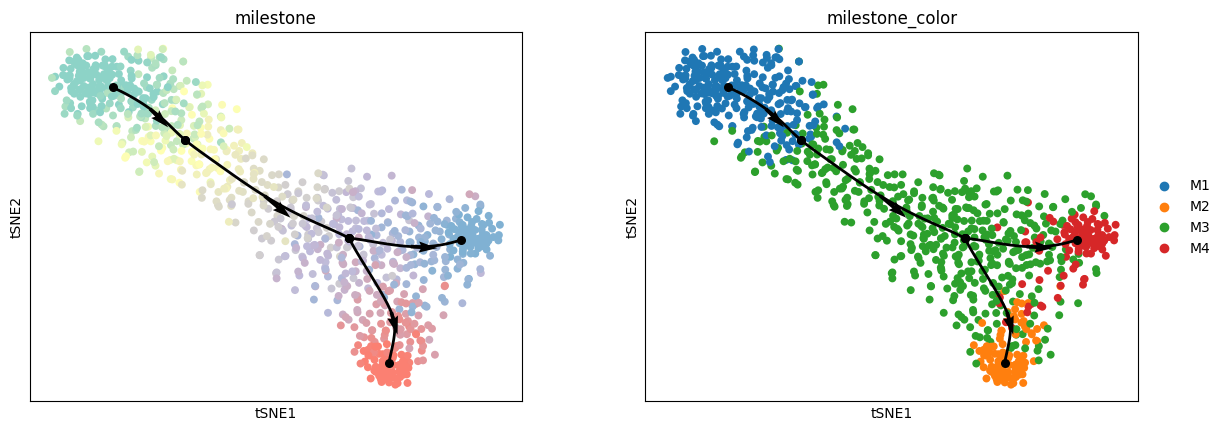

In [3]:
comp1_method = cfe.method.FateMethod(method_name="slingshot")

comp1_method.infer_trajectory(fadata)

cfe.plot.plot_trajectory(fadata, basis="tsne", color=cluster_key_list)

[2025年01月16日 18时04分24秒] INFO     method_backend:                                                             
                                       <cfe.method.fate_dynverse_docker_backend.DynverseDockerBackend object at    
                                       0x73c9de646bf0>                                                             


<Axes: title={'center': 'milestone_color'}, xlabel='tSNE1', ylabel='tSNE2'>

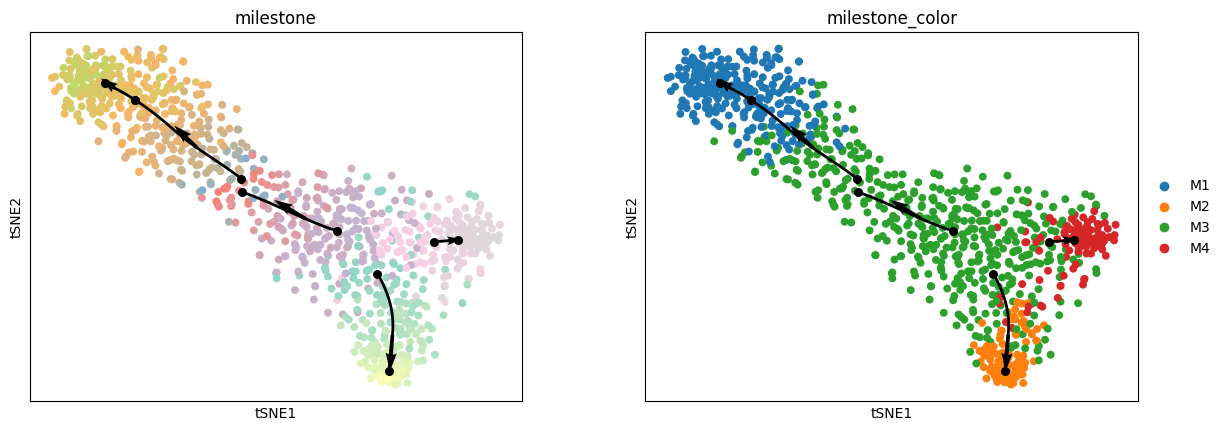

In [4]:
paga_method = cfe.method.FateMethod(method_name="paga")

prior_information = {
    "start_id": "C1",
    "groups_id": fadata.obs[cluster_key].tolist()
}
parameters = {"filter_features": False, "connectivity_cutoff": 0.5}
fadata.add_prior_information(**prior_information)  # add prior information to fadata
paga_method.infer_trajectory(fadata, parameters=parameters)

cfe.plot.plot_trajectory(fadata, basis="tsne", color=cluster_key_list)

[2025年01月16日 18时04分37秒] INFO     method_backend:                                                             
                                       <cfe.method.fate_dynverse_docker_backend.DynverseDockerBackend object at    
                                       0x73c9ba17fc10>                                                             


<Axes: title={'center': 'milestone_color'}, xlabel='tSNE1', ylabel='tSNE2'>

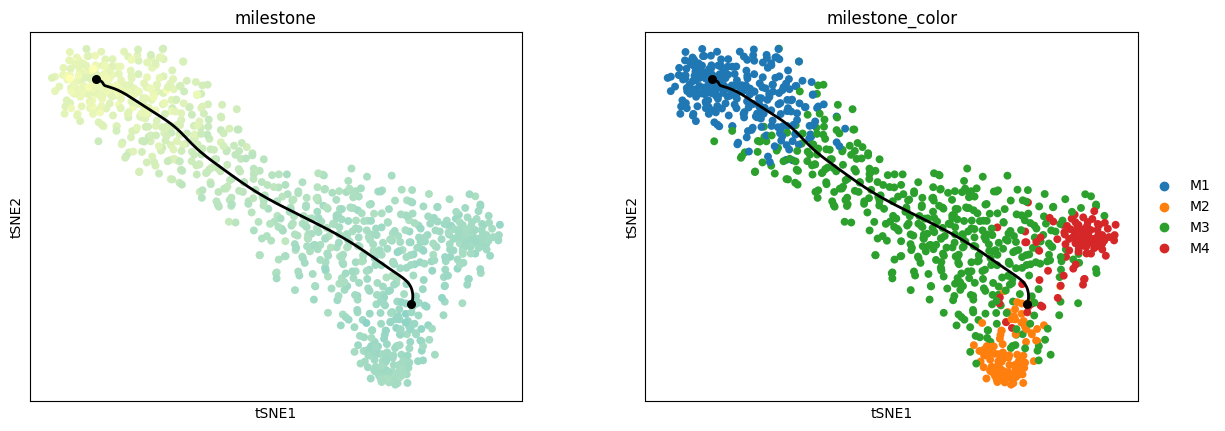

In [5]:
comp1_method = cfe.method.FateMethod(method_name="comp1")

comp1_method.infer_trajectory(fadata)

cfe.plot.plot_trajectory(fadata, basis="tsne", color=cluster_key_list)

## 指标

In [6]:
parsed_model_name_list = fadata.get_all_model_name()
model_name_list = fadata.get_all_model_name(parse=False)
parsed_model_name_list, model_name_list

[2025年01月16日 18时04分46秒] WARNING  'ref' is not a valid random_time_string, don't need parse                   


(['ref',
  'slingshot-dynverse_docker',
  'paga-dynverse_docker',
  'comp1-dynverse_docker'],
 ['ref',
  '20250116_180408__slingshot-dynverse_docker__mqJdv5em6C',
  '20250116_180424__paga-dynverse_docker__J1bKCrim95',
  '20250116_180437__comp1-dynverse_docker__qPe4nSDlRg'])

In [7]:
metrics = cfe.metric.metrics
metric_id_list = metrics[metrics["category"] == "topology"]["metric_id"].tolist()
metric_id_list

['edge_flip', 'him', 'isomorphic']

In [8]:
import pandas as pd


model_metric_dict = {}

for model_name in model_name_list:
    model_metric = cfe.metric.calculate_metrics(
        fadata,
        metrics=metric_id_list,
        now_model=model_name,
        ref_model="ref"
    )
    model_metric_dict[model_name] = model_metric

df = pd.DataFrame(model_metric_dict).T
df

,isomorphic,edge_flip,him
ref,1,0,0
20250116_180408__slingshot-dynverse_docker__mqJdv5em6C,1,0,0
20250116_180424__paga-dynverse_docker__J1bKCrim95,0,0,0
20250116_180437__comp1-dynverse_docker__qPe4nSDlRg,0,0,0
